In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("../")
data_path="data/winequality-red.csv"
wines=pd.read_csv(data_path)

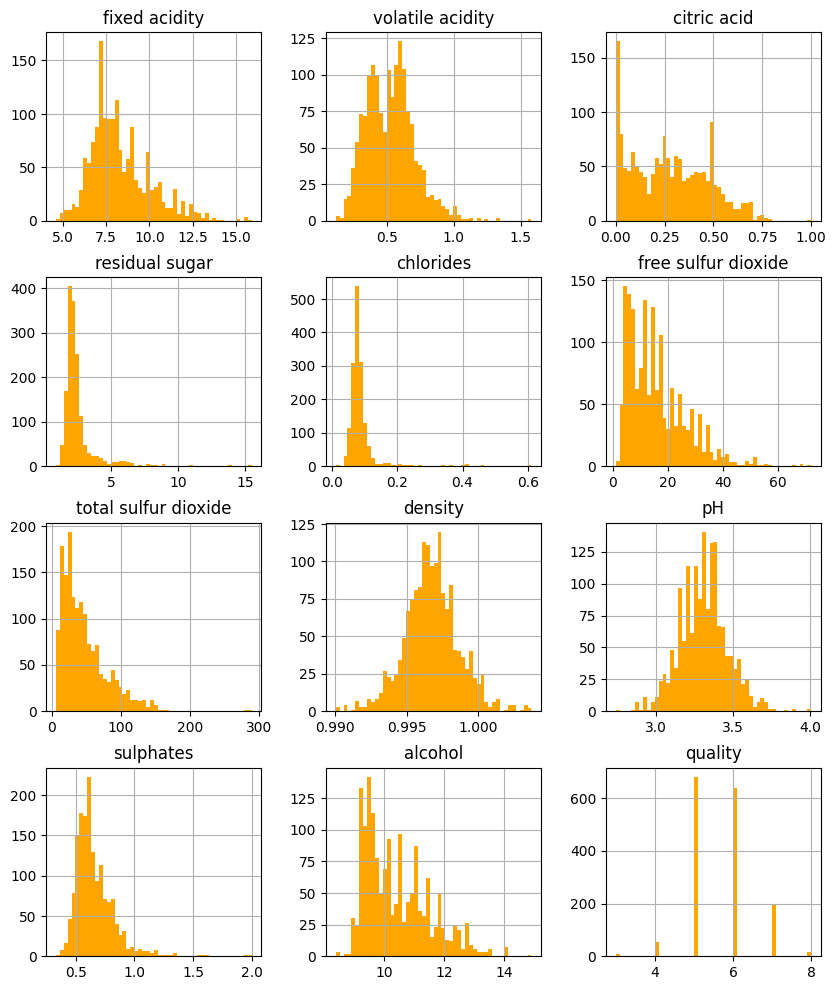

In [4]:
wines.hist(color="orange",bins=50,figsize=(10,12))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=wines.drop(columns=["quality"])
y=wines["quality"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import ElasticNet

In [11]:
en_model=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
en_model.fit(x_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [12]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [13]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    return rmse,mae,r2

In [14]:
y_pred=en_model.predict(x_test)
(rmse,mae,r2)=eval_metrics(y_test,y_pred)

In [16]:
print(" rmse  : ",rmse, "\n mae : ",mae , "\n r2_score : ",r2 )

 rmse  :  0.6985911523308714 
 mae :  0.5590548688059019 
 r2_score :  0.25321312561494613


In [17]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [18]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
for i in x.columns:
    print(i," : ",x[i].dtypes)

fixed acidity  :  float64
volatile acidity  :  float64
citric acid  :  float64
residual sugar  :  float64
chlorides  :  float64
free sulfur dioxide  :  float64
total sulfur dioxide  :  float64
density  :  float64
pH  :  float64
sulphates  :  float64
alcohol  :  float64
